In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
dataset_path="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/"
path_very_low="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/very_Low_Turbidity/"
path_low="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/Low_Turbidity/"

path_med="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/Medium_Turbidity/"
path_high="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/High_Turbidity/"

very_low_dir=os.path.join(path_very_low)
low_dir = os.path.join(path_low)

# Directory with Medium_Turbidity images
medium_dir = os.path.join(path_med)

# Directory with High_Turbidity images
high_dir = os.path.join(path_high)

In [ ]:
train_vlow_turb = os.listdir(very_low_dir)
print(train_vlow_turb[:5])

train_low_turb = os.listdir(low_dir)
print(train_low_turb[:5])

train_medium_turb = os.listdir(medium_dir)
print(train_medium_turb[:5])

train_high_turb = os.listdir(high_dir)
print(train_high_turb[:5])

['140_1.png', '140_2.png', '140.png', '140a.png', '140aa.png']
['380_1.png', '380_2.png', '380_1(1).png', '380_2(1).png', '310.png']
['630_1.png', '630_2.png', '630_1(1).png', '630_3.png', '600_1.png']
['720_1.png', '720_2.png', '720_1(1).png', '720_2(1).png', '780_1.png']


In [ ]:
vld=len(os.listdir(very_low_dir))
ld=len(os.listdir(low_dir))
md=len(os.listdir(medium_dir))
hd=len(os.listdir(high_dir))
print('total very_Low_Turbidity images:', vld)
print('total Low_Turbidity images:', ld)
print('total Medium_Turbidity images:', md)
print('total High_Turbidity images:', hd)


total very_Low_Turbidity images: 54
total Low_Turbidity images: 55
total Medium_Turbidity images: 61
total High_Turbidity images: 116


<BarContainer object of 4 artists>

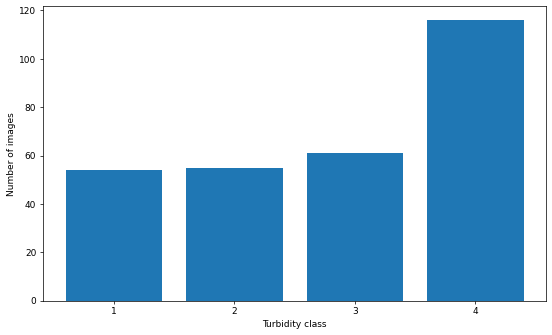

In [ ]:
import matplotlib.pyplot as plt

nb_imgs=[ vld, ld, md, hd]
bins = [ '1', '2', '3', '4']
plt.figure(figsize=(10, 6),dpi=65)
plt.ylabel('Number of images')
plt.xlabel('Turbidity class')

plt.bar( bins , nb_imgs)



On note que les données présentent deux contraintes majeures: elles sont réduites et non équilibrées étant que les images prises pour des hautes turbidité sont beaucoup plus que les autres classes, meme si cette classe est la plus facile à déduire par les modèles.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some very low turbid images...


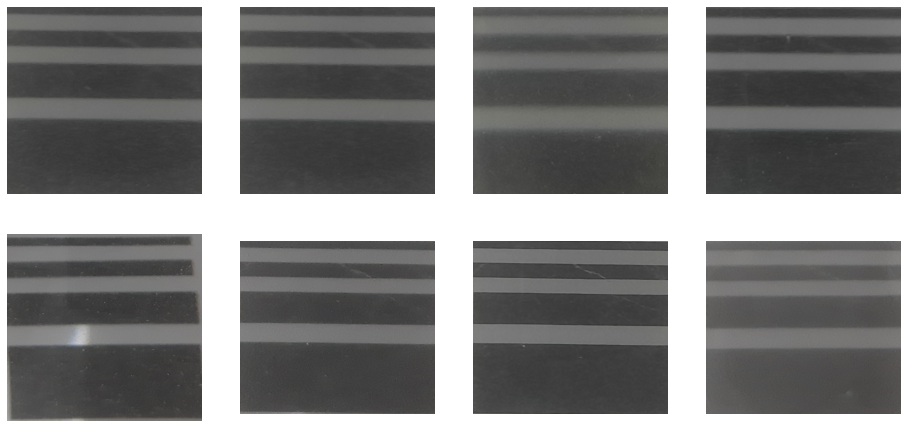

Showing some low turbid images...


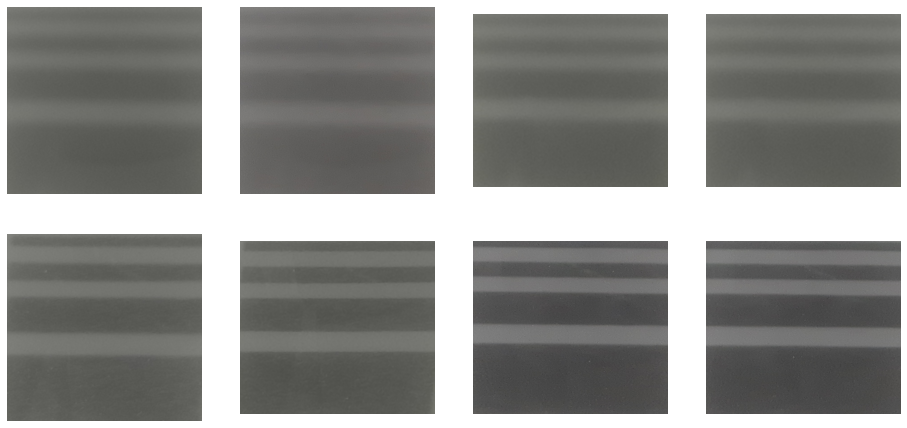

Showing some medium turbid images...


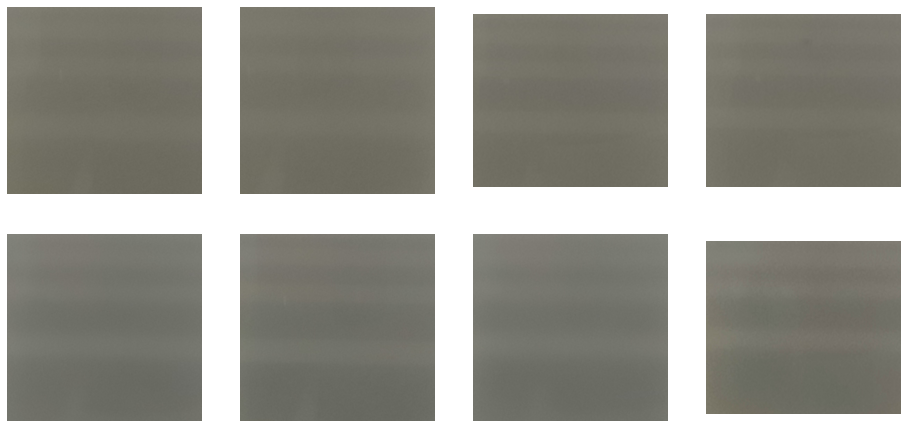

Showing some high turbid images...


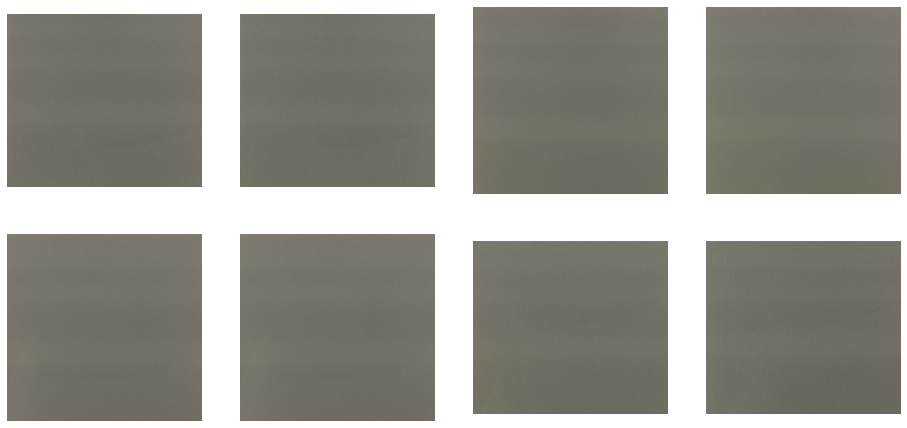

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_vlow_pix = [os.path.join(very_low_dir, fname) 
                for fname in train_vlow_turb[pic_index-8:pic_index]]

next_low_pix = [os.path.join(low_dir, fname) 
                for fname in train_low_turb[pic_index-8:pic_index]]

next_medium_pix = [os.path.join(medium_dir, fname) 
                for fname in train_medium_turb[pic_index-8:pic_index]]

next_high_pix = [os.path.join(high_dir, fname) 
                for fname in train_high_turb[pic_index-8:pic_index]]

print ("Showing some very low turbid images...")
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_vlow_pix):
    
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Showing some low turbid images...")
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_low_pix):
    
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Showing some medium turbid images...")
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_medium_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

print ("Showing some high turbid images...")
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_high_pix):
    
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Building the `ImageDataGenerator` object


In [ ]:
batch_size = 10

On recourt au ImageDataGenerator pour créer les données d'entrainements et de validation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path="/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/train"
valid_path="/content/drive/MyDrive/Colab Notebooks/PFA/Datasett2/valid"
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

   # validation_split=0.25)  # set validation split

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(400,400 ),  # All images will be resized to 300 x 300
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['very_Low_Turbidity','Low_Turbidity','Medium_Turbidity','High_Turbidity'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical', shuffle=True,
        #subset='training'
        )



validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    #dataset_path, # same directory as training data
    target_size=(400,400),
    batch_size=batch_size,
    classes = ['very_Low_Turbidity','Low_Turbidity','Medium_Turbidity','High_Turbidity'],
    class_mode='categorical', shuffle=True ,
   # subset='validation'
   ) # set as validation data


Found 198 images belonging to 4 classes.
Found 46 images belonging to 4 classes.


In [ ]:
total_sample=train_generator.n
total_sample

198





## Building models

In [ ]:
import tensorflow as tf

##1er modèle CNN

##Simple CNN MODEL 
##MODEL 1


In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    Conv2D(16, (3,3), activation='relu', input_shape=(400,400 , 3)),
    BatchNormalization(),
    
    AveragePooling2D(2, 2),
    GaussianDropout(0.3),

    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    AveragePooling2D(2,2),

    
    # The third convolution
    Conv2D(64, (3,3), activation='relu'),
    #AveragePooling2D(2,2),
    # The fourth convolution
    Conv2D(128, (3,3), activation='relu'),
    AveragePooling2D(2, 2),
    #MaxPooling2D(2,2),
    GaussianDropout(0.4),


    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),

    # 128 neuron in the fully-connected layer WITH regularizers to minimize overfitting
    Dense(128, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-3),
                                                 # activity_regularizer=regularizers.L2(1e-3)
                                                 ),
                                    
    Dense(64, activation='relu',kernel_regularizer=regularizers.L2(1e-3),
                                                  bias_regularizer=regularizers.L2(1e-3),
                                                 # activity_regularizer=regularizers.L2(1e-3)
                                                  ),
    GaussianDropout(0.5),
                                
    #Dense(32, activation='relu',kernel_regularizer=regularizers.L2(1e-2),
                       #                           bias_regularizer=regularizers.L2(1e-3),
                                                 # activity_regularizer=regularizers.L2(1e-3)
#                                                  ),

    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer="adagrad",
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 398, 398, 16)      448       
                                                                 
 batch_normalization_5 (Batc  (None, 398, 398, 16)     64        
 hNormalization)                                                 
                                                                 
 average_pooling2d_12 (Avera  (None, 199, 199, 16)     0         
 gePooling2D)                                                    
                                                                 
 gaussian_dropout_12 (Gaussi  (None, 199, 199, 16)     0         
 anDropout)                                                      
                                                                 
 conv2d_17 (Conv2D)          (None, 197, 197, 32)      4640      
                                                      

In [ ]:
#fit

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=23)


n_epochs=120
#PLOTTING ARCHITECTURE OF THE MODEL IN DRIVE
plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/results/other_arch/5_.png",
     show_shapes=True)

##FITING 
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator, 
                              verbose = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/120
14/14 [==============================] - 61s 4s/step - loss: 1.4137 - acc: 0.5625 - val_loss: 1.6416 - val_acc: 0.3934
Epoch 2/120
14/14 [==============================] - 59s 4s/step - loss: 1.0811 - acc: 0.6964 - val_loss: 1.6005 - val_acc: 0.3934
Epoch 3/120
14/14 [==============================] - 62s 4s/step - loss: 1.0949 - acc: 0.6696 - val_loss: 1.5691 - val_acc: 0.3934
Epoch 4/120
14/14 [==============================] - 60s 4s/step - loss: 1.0334 - acc: 0.7143 - val_loss: 1.5345 - val_acc: 0.3934
Epoch 5/120
14/14 [==============================] - 60s 4s/step - loss: 0.9466 - acc: 0.7768 - val_loss: 1.5454 - val_acc: 0.3934
Epoch 6/120
14/14 [==============================] - 60s 4s/step - loss: 0.9464 - acc: 0.7366 - val_loss: 1.5046 - val_acc: 0.3934
Epoch 7/120
14/14 [==============================] - 61s 4s/step - loss: 0.9303 - acc: 0.7500 - val_loss: 1.4862 - val_acc: 0.3934
Epoch 8/120
14/14 [==============================] - 61s 4s/step - loss: 0.9684 - a

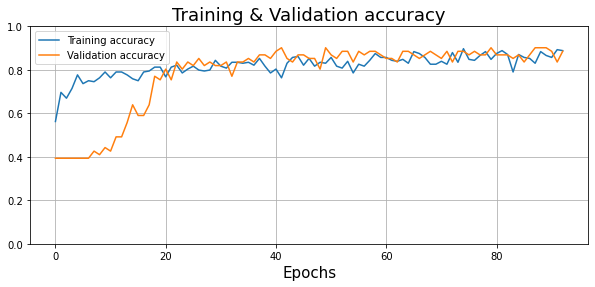

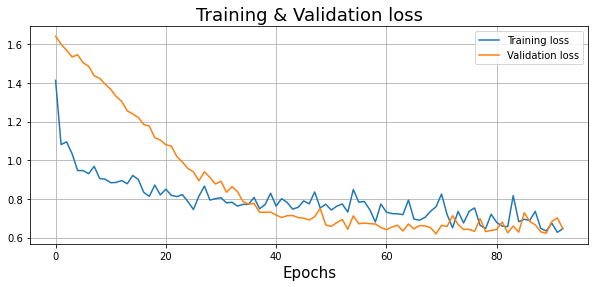

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/other_arch/5.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/other_arch/55.png")
plt.show()


##MODEL 2

In [ ]:
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend 
import tensorflow as tf
print(tf.__version__)

def CNN(input_size = (400,400,3)):
    size_filter_in = 16
    #kernel_init = 'glorot_uniform'
    kernel_init = 'he_normal'
    activation_layer = 'relu' 
    padding="same"
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, (3,3), activation = 'relu', padding = padding, kernel_initializer = kernel_init)(inputs)
    batch_norm=BatchNormalization()(conv1)

    conv1 = Conv2D(size_filter_in, (3,3), activation = 'relu', padding = padding, kernel_initializer = kernel_init)(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, (3,3), activation = 'relu', padding = padding, kernel_initializer = kernel_init)(pool1)
    conv2 = Conv2D(size_filter_in*2, (3,3), activation = 'relu', padding = padding, kernel_initializer = kernel_init)(conv2)
    batch_norm=BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(batch_norm)
    
    conv3 = Conv2D(size_filter_in*4, (3,3), activation = 'relu', padding = padding, kernel_initializer = kernel_init)(pool2)
    conv3 = Conv2D(size_filter_in*4, (3,3), activation = 'relu', padding = padding, kernel_initializer = kernel_init)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    drop5 = Dropout(0.3)(pool3)


    up7 = Conv2D(size_filter_in*4, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(merge7)
    conv7 = Conv2D(size_filter_in*4, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(conv7)
    up8 = Conv2D(size_filter_in*2, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(merge8)
    conv8 = Conv2D(size_filter_in*2, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(conv8)
    
    up9 = Conv2D(size_filter_in, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(merge9)
    conv9 = Conv2D(size_filter_in, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(conv9)
    conv9 = Conv2D(8, (3,3), activation = activation_layer, padding = padding, kernel_initializer = kernel_init)(conv9)

    conv10 = Conv2D(4, (1,1), activation = 'relu')(conv9)
    # Flatten the results to feed into a dense layer
    x=tf.keras.layers.Flatten()(conv10)
    x=tf.keras.layers.Dropout(0.4)(x)

    # 128 neuron in the fully-connected layer
    x=tf.keras.layers.Dense(128, activation='relu')(x)
    x=tf.keras.layers.Dense(64, activation='relu')(x)

    # 5 output neurons for 5 classes with the softmax activation
    x=tf.keras.layers.Dense(4, activation='softmax')(x)


    model = Model(inputs,x)

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
    
    model.summary()


    return model

2.8.0


In [ ]:
#@title
n_epochs = 60
model=CNN()
history = model.fit_generator(train_generator, epochs=n_epochs,
                    validation_data = validation_generator, verbose = 1)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_51 (Conv2D)             (None, 400, 400, 16  448         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_52 (Conv2D)             (None, 400, 400, 16  2320        ['conv2d_51[0][0]']              
                                )                                                           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/60
11/11 [==============================] - 23s 2s/step - loss: 5.5996 - acc: 0.2970 - val_loss: 1.3761 - val_acc: 0.4048
Epoch 2/60
11/11 [==============================] - 20s 2s/step - loss: 1.3541 - acc: 0.3861 - val_loss: 1.3691 - val_acc: 0.2143
Epoch 3/60
11/11 [==============================] - 20s 2s/step - loss: 1.3784 - acc: 0.3119 - val_loss: 1.3810 - val_acc: 0.4048
Epoch 4/60
11/11 [==============================] - 20s 2s/step - loss: 1.2975 - acc: 0.4059 - val_loss: 1.3224 - val_acc: 0.4048
Epoch 5/60
11/11 [==============================] - 20s 2s/step - loss: 1.0981 - acc: 0.4752 - val_loss: 1.2286 - val_acc: 0.4048
Epoch 6/60
11/11 [==============================] - 20s 2s/step - loss: 1.0503 - acc: 0.6188 - val_loss: 1.2429 - val_acc: 0.4048
Epoch 7/60
11/11 [==============================] - 20s 2s/step - loss: 0.8677 - acc: 0.6832 - val_loss: 0.8916 - val_acc: 0.6071
Epoch 8/60
11/11 [==============================] - 20s 2s/step - loss: 0.8225 - acc: 0.63

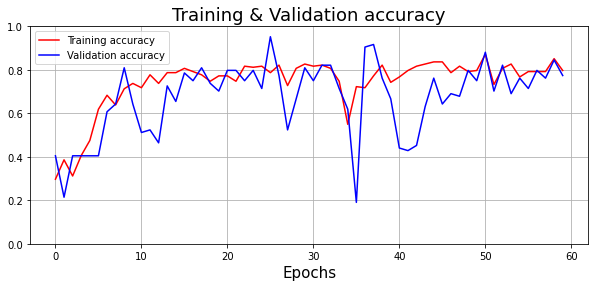

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title
# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.figure()

plt.show()

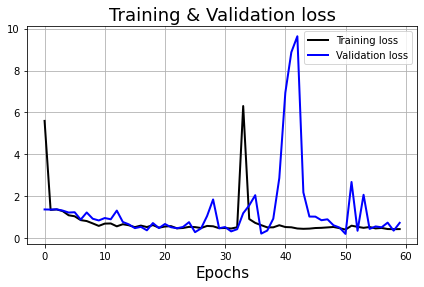

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title
# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(7,4))
plt.grid(True)
plt.plot(epochs, loss, 'r', label='Training loss',c='k',lw=2,markersize=2)
plt.plot(epochs, val_loss, 'b', label='Validation loss',lw=2,markersize=2)
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.figure()

plt.show()

# **Aquasight**
(version 1.0)

In [ ]:
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend 

from keras import regularizers

import tensorflow as tf

def Aquasight(input_size = (400,400,3)):

    #kernel_init = 'glorot_uniform'
    kernel_init = 'he_normal'
    inputs = Input(input_size)

    conv1 = Conv2D(64, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(inputs)
    batch_norm=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(batch_norm)

    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


    conv3 = Conv2D(32, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(pool2)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)



    # Flatten the results to feed into a dense layer    
    x=Flatten()(pool3)

    x=Dense(64, activation='relu')(x)
    x=Dropout(0.5)(x)
    x=Dense(4, activation='softmax')(x)


    model = Model(inputs,x)

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
    
    model.summary()


    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
 
#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)


n_epochs=100
model=Aquasight()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 398, 398, 64)      1792      
                                                                 
 batch_normalization_2 (Batc  (None, 398, 398, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 199, 199, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 197, 197, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 98, 98, 64)       0   

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/results/aquasight/architecture.png",
     show_shapes=True)

#fit
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator, 
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
23/23 [==============================] - 126s 5s/step - loss: 3.6134 - acc: 0.5000 - val_loss: 1.3779 - val_acc: 0.2295
Epoch 2/100
23/23 [==============================] - 123s 5s/step - loss: 0.9092 - acc: 0.6250 - val_loss: 1.0249 - val_acc: 0.3934
Epoch 3/100
23/23 [==============================] - 122s 5s/step - loss: 0.9505 - acc: 0.5893 - val_loss: 1.3865 - val_acc: 0.2295
Epoch 4/100
23/23 [==============================] - 123s 5s/step - loss: 1.0726 - acc: 0.6027 - val_loss: 1.1265 - val_acc: 0.4754
Epoch 5/100
23/23 [==============================] - 122s 5s/step - loss: 0.8128 - acc: 0.7366 - val_loss: 1.0450 - val_acc: 0.4590
Epoch 6/100
23/23 [==============================] - 123s 5s/step - loss: 0.6251 - acc: 0.7545 - val_loss: 9.9773 - val_acc: 0.3934
Epoch 7/100
23/23 [==============================] - 127s 6s/step - loss: 0.8098 - acc: 0.7098 - val_loss: 1.1798 - val_acc: 0.4098
Epoch 8/100
23/23 [==============================] - 124s 5s/step - loss: 0.

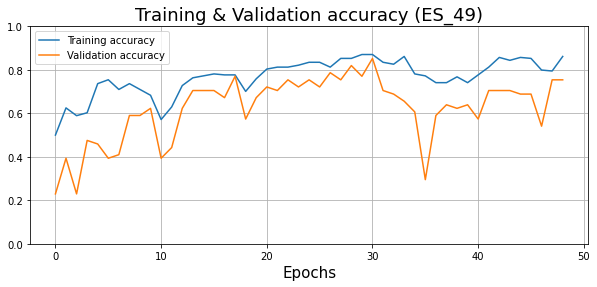

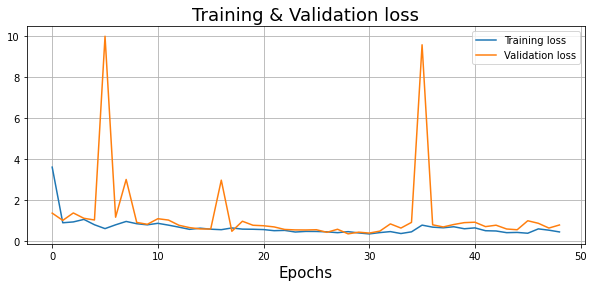

In [ ]:
import matplotlib.pyplot as plt
#Plot and saving results in DRIVE
# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy (ES_49)',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/aquasight/accuracy.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/aquasight/loss.png")
plt.show()


#**Aquasight_Modifié **

In [ ]:
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend 

from keras import regularizers

import tensorflow as tf
print(tf.__version__)

def Aquasight_mod(input_size = (400,400,3)):
    #size_filter_in = 16
    #kernel_init = 'glorot_uniform'
    kernel_init = 'he_normal'
    inputs = Input(input_size)

    conv1 = Conv2D(16, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(inputs)
    #batch_norm=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #pool1 = GlobalAveragePooling2D()(batch_norm)

    conv2 = Conv2D(32, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(pool1)
    #batch_norm=BatchNormalization()(conv2)
    #drop=tf.keras.layers.Dropout(0.2)(batch_norm)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


    conv3 = Conv2D(64, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(pool2)

    #batch_norm=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

    conv4 = Conv2D(128, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(pool3)
    #batch_norm=BatchNormalization()(conv4)
    #pool4 = GlobalAveragePooling2D()(batch_norm)

    pool4 = MaxPooling2D(pool_size=(2,2))(conv4)


    x=tf.keras.layers.Dropout(0.6)(pool4)
    # Flatten the results to feed into a dense layer    

    x=tf.keras.layers.Flatten()(x)

    x=tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.04))(x)
    x=tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.04))(x)
    x=tf.keras.layers.Dense(4, activation='sigmoid')(x)


    model = Model(inputs,x)

    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
    
    model.summary()


    return model

2.8.0


In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
 

#training
#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)


n_epochs=100
model=Aquasight_mod()

plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/results/aquasight_modif/4_.png",
     show_shapes=True)

history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator, 
                              verbose = 1)


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 398, 398, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 199, 199, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 197, 197, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 96, 96, 64)        1849

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
23/23 [==============================] - 9s 317ms/step - loss: 6.0970 - acc: 0.3438 - val_loss: 4.6831 - val_acc: 0.5574
Epoch 2/100
23/23 [==============================] - 6s 242ms/step - loss: 3.8854 - acc: 0.6429 - val_loss: 3.2733 - val_acc: 0.6393
Epoch 3/100
23/23 [==============================] - 5s 235ms/step - loss: 3.0323 - acc: 0.5982 - val_loss: 2.5953 - val_acc: 0.6230
Epoch 4/100
23/23 [==============================] - 5s 232ms/step - loss: 2.3391 - acc: 0.6741 - val_loss: 2.1123 - val_acc: 0.7377
Epoch 5/100
23/23 [==============================] - 6s 251ms/step - loss: 1.9337 - acc: 0.7723 - val_loss: 1.6716 - val_acc: 0.7541
Epoch 6/100
23/23 [==============================] - 5s 236ms/step - loss: 1.7153 - acc: 0.7545 - val_loss: 1.4857 - val_acc: 0.6721
Epoch 7/100
23/23 [==============================] - 6s 238ms/step - loss: 1.4168 - acc: 0.7946 - val_loss: 1.3110 - val_acc: 0.7377
Epoch 8/100
23/23 [==============================] - 6s 263ms/step - 

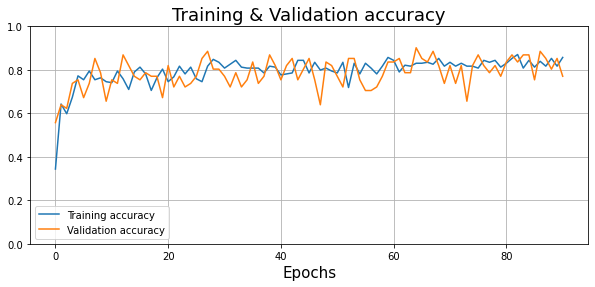

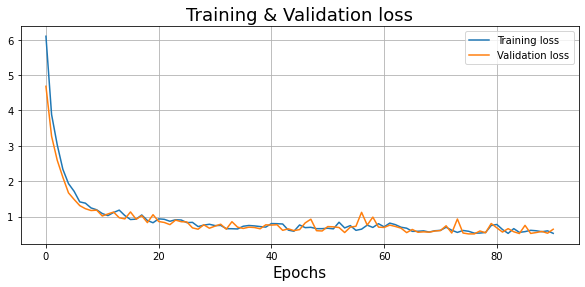

In [ ]:

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/aquasight_modif/4.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/aquasight_modif/44.png")
plt.show()


#INCEPTION RESNET Architecture

In [ ]:
n_epochs=30



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB7    # a utilisé toute la RAM allouée (très couteux)
from tensorflow.keras.optimizers import Adagrad,Adam
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
from keras import regularizers


n_epochs=50
base_model = InceptionResNetV2(include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(400,400,3),
    pooling='avg',
    classes=4,
    classifier_activation=None)

x = GaussianDropout(0.4)(base_model.output)
x = Flatten()(x)

x = Dense(64, activation='relu',kernel_regularizer=regularizers.L2( 1e-2),
                                                  bias_regularizer=regularizers.L2(1e-2))(x)

x = Dense(32, activation='relu',kernel_regularizer=regularizers.L2(1e-2),
                                                  bias_regularizer=regularizers.L2(1e-2))(x)
x= GaussianDropout(0.4)(x)

x = Dense(4, activation='softmax')(x)
model = Model(base_model.inputs, x)



#model.summary()
model.compile(loss='categorical_crossentropy',
             # optimizer=Adagrad(lr=0.0001),
              optimizer="adam",
              metrics=['acc'])

#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

   

#plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/results/inc_resnet/2_.png",
 #    show_shapes=True)




In [ ]:
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
23/23 [==============================] - 268s 10s/step - loss: 2.6745 - acc: 0.6161 - val_loss: 3.5671 - val_acc: 0.3934
Epoch 2/50
23/23 [==============================] - 37s 2s/step - loss: 2.5064 - acc: 0.5938 - val_loss: 2.7056 - val_acc: 0.3934
Epoch 3/50
23/23 [==============================] - 38s 2s/step - loss: 2.1559 - acc: 0.6429 - val_loss: 2.4190 - val_acc: 0.4590
Epoch 4/50
23/23 [==============================] - 38s 2s/step - loss: 1.9621 - acc: 0.6741 - val_loss: 2.4224 - val_acc: 0.4426
Epoch 5/50
23/23 [==============================] - 38s 2s/step - loss: 1.9657 - acc: 0.6071 - val_loss: 2.4447 - val_acc: 0.2131
Epoch 6/50
23/23 [==============================] - 38s 2s/step - loss: 1.8643 - acc: 0.6384 - val_loss: 2.5934 - val_acc: 0.2131
Epoch 7/50
23/23 [==============================] - 38s 2s/step - loss: 1.6894 - acc: 0.6652 - val_loss: 2.3948 - val_acc: 0.3934
Epoch 8/50
23/23 [==============================] - 38s 2s/step - loss: 1.5792 - acc: 0.

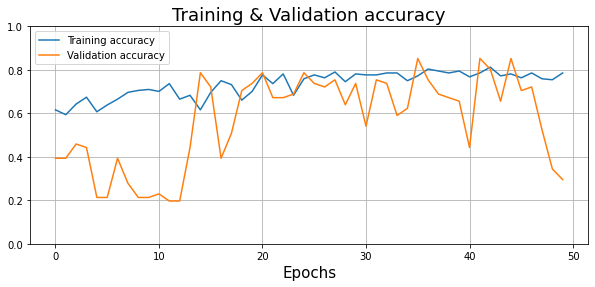

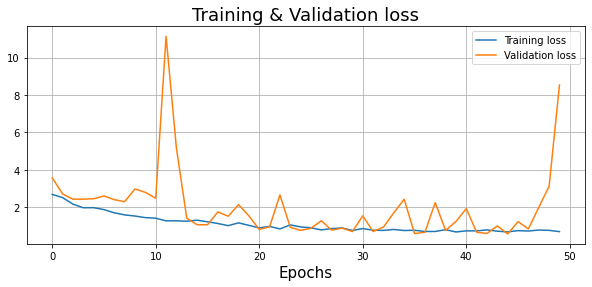

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/inc_resnet/2.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/inc_resnet/22.png")
plt.show()


Why is the validation accuracy fluctuating?
The learning rate may be big, so try decreasing it. The size of validation set may be too small, such that small changes in the output causes large fluctuations in the validation error.

#Resnet18

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import *
from keras import regularizers

class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(32, (5,5), strides=2,
                             padding="valid", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(32)
        self.res_1_2 = ResnetBlock(32)
        self.res_2_1 = ResnetBlock(64, down_sample=True)
        self.res_2_2 = ResnetBlock(64)
        self.res_3_1 = ResnetBlock(128, down_sample=True)
        self.res_3_2 = ResnetBlock(128)
        self.res_4_1 = ResnetBlock(256, down_sample=True)
        self.res_4_2 = ResnetBlock(256)
        self.avg_pool = AveragePooling2D()
        self.flat = Flatten()
        self.drop=GaussianDropout(0.5)
        self.fc1 = Dense(64, activation='relu',kernel_regularizer=regularizers.L2( 1e-2),
                                                  bias_regularizer=regularizers.L2(1e-2))
        self.fc2 = Dense(32, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2))

        self.drop2=GaussianDropout(0.3)
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2
                      #    , self.res_4_1, self.res_4_2
                          ]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.drop(out)
        #out = self.fc1(out)
        out = self.fc2(out)
        out = self.drop2(out)
        out = self.fc(out)
        return out


In [ ]:
model = ResNet18(4)
model.build(input_shape = (None,400,400,3))
#use categorical_crossentropy since the label is one-hot encoded
#from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.compile(optimizer = "adagrad",loss='categorical_crossentropy', metrics=["acc"]) 
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          multiple                  2432      
                                                                 
 batch_normalization_20 (Bat  multiple                 128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 resnet_block_8 (ResnetBlock  multiple       

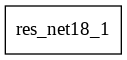

In [ ]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
#I did not use cross validation, so the validate performance is not accurate.
n_epochs=80
#PLOTTING ARCHITECTURE OF THE MODEL IN DRIVE
plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/results/resnet/3_.png",
     show_shapes=True)

In [ ]:
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/80
20/20 [==============================] - 6s 226ms/step - loss: 1.4578 - acc: 0.4747 - val_loss: 1.7987 - val_acc: 0.1957
Epoch 2/80
20/20 [==============================] - 4s 199ms/step - loss: 1.0504 - acc: 0.5909 - val_loss: 1.4565 - val_acc: 0.0870
Epoch 3/80
20/20 [==============================] - 4s 201ms/step - loss: 0.8715 - acc: 0.6313 - val_loss: 1.5467 - val_acc: 0.2174
Epoch 4/80
20/20 [==============================] - 4s 199ms/step - loss: 0.8163 - acc: 0.6717 - val_loss: 1.6180 - val_acc: 0.2174
Epoch 5/80
20/20 [==============================] - 4s 204ms/step - loss: 0.7820 - acc: 0.6869 - val_loss: 1.7145 - val_acc: 0.3261
Epoch 6/80
20/20 [==============================] - 4s 201ms/step - loss: 0.8744 - acc: 0.6616 - val_loss: 1.6179 - val_acc: 0.4348
Epoch 7/80
20/20 [==============================] - 4s 199ms/step - loss: 0.7411 - acc: 0.7222 - val_loss: 1.4307 - val_acc: 0.4783
Epoch 8/80
20/20 [==============================] - 4s 200ms/step - loss: 0.

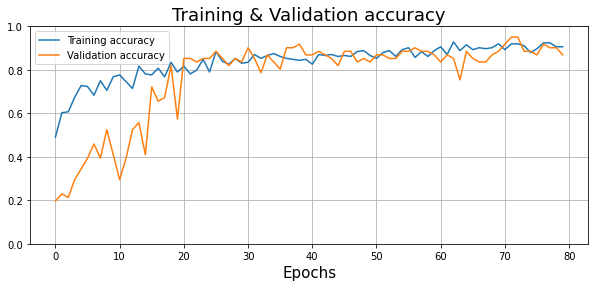

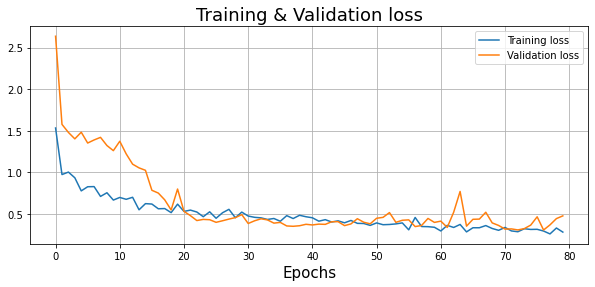

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/resnet/3.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/results/resnet/3.png")
plt.show()
